In [648]:

import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA


Recall the Horner's rule:

Given $p(x_k) = f_k$ for $k = 0, \cdots, d$

$$p(x_0)  = a_0 + x_0(a_1 + x_0(a_2 + \cdots + x_0(a_{n-1} + b_n x_0))) 
 = a_0 + x_0(a_1 + x_0(a_2 + \cdots + x_0 b_{n-1})) $$

In [649]:
# Generate van der Monde, allow over/under fitting

# Generate Row for van der Monde
def gen_row(x_i,d):
    row = np.array([pow(x_i, k) for k in range(d+1)])
    return row

# Input: 
# x: uniformly spaced value; d: number of points to fit

def mat_monde(x, d):
    mat = np.array([gen_row(x_i, d)  for x_i in x  ])
    return mat

In [650]:
# Testing  Vandermonde generator

x = [1,2,3, 4]
mat = mat_monde(x, len(x)-1)
print("Test Van der Monte Matrix generator:")
print(mat)


Test Van der Monte Matrix generator:
[[ 1  1  1  1]
 [ 1  2  4  8]
 [ 1  3  9 27]
 [ 1  4 16 64]]


In [651]:
# pFit.py

# LA.inv: find inverse matrix
# LA.cond: condition number

# Solve for pk: p(xk) = fk
# output: pk, condition no.
def pFit(xk, fk):
    mat = mat_monde(xk, len(xk)-1)
    m_inv = LA.inv(mat)
    pk = np.dot(m_inv, fk)
    return pk, LA.cond(mat)



In [652]:
#  pEval.py

# Evaluate p(x), for given pk and x


# Horner's Rule
def pEval_h(x, pk):
    l = len(pk)
    y = pk[-1]
    for i in range(l):
        j = i+1
        y = x * y + pk[-j-1]
        if (-j-1) == (-len(pk)):
               break
    return y

# Directly multiplying
def pEval(x, pk):
    d = len(pk) - 1
    y = np.array([pow(x, i) for i in range(d + 1)])
    fx = np.dot(y, pk)
    return fx



In [675]:
# pTest.py

# Test Module on random x and f = p(x)
d = 10

x = np.random.rand(d)
f = np.random.rand(d)

pk = pFit(x, f)[0]


p_x = [pEval(i, pk) for i in x]
p_xh = [pEval_h(i, pk) for i in x]

print("---Test Modules on random x and f---\n")
print("Abs. Error, using direct multiplication")
print(p_x-f)
print('\n')
print("Abs. Error, using Horner's Rule")
print(p_xh-f)



---Test Modules on random x and f---

Abs. Error, using direct multiplication
[  7.29494243e-12  -1.59871395e-08   9.05348494e-09  -8.45305281e-09
   6.58860455e-09  -8.59674143e-09  -1.67501126e-08  -1.73361214e-10
  -5.80760762e-09  -4.29360481e-09]


Abs. Error, using Horner's Rule
[  4.57356375e-12  -1.54878482e-08   9.05347963e-09  -8.44198256e-09
   6.58867183e-09  -8.60845828e-09  -1.67784633e-08  -1.75983117e-10
   5.89760341e-09  -4.28433222e-09]


In [654]:
# plot the condition number with respect to d


# Set maximal d
d_max = 100
cond_no = np.zeros(d_max)
#x = np.random.rand(d_max)
#f = np.random.rand(d_max)
x = np.linspace(10, 100, d_max)
f = 100*x

# Take partial array for condition number computation
for j in range(d_max):
    i = j + 2
    cond_no[j] = pFit(x[:i], f[:i])[1]

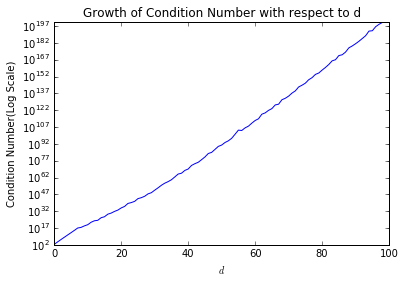

In [655]:
# Plotting 
plt.plot(cond_no)
plt.yscale('log')
plt.ylabel("Condition Number(Log Scale)")
plt.xlabel("$d$")
plt.title("Growth of Condition Number with respect to d")

### Comments:
With log scale on y-axis, condition number is proportional to d.

That is, condition number grows exponentially with respect to d.

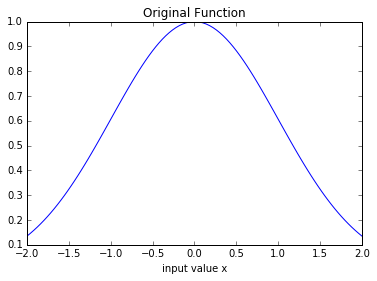

In [656]:
def g(x):
    return np.exp(-pow(x, 2)/2.)


# Evaluate for Polyn
step = 100 
uk = np.linspace(-2, 2, step)
fk = [g(x) for x in uk]
pk = pFit(uk, fk)[0]

#plt.plot(xk, fk)
plt.plot(uk, fk)
plt.title("Original Function")
plt.xlabel("input value x")

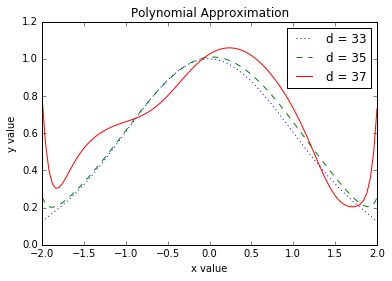

In [657]:
# Evaluation for Polyn

step = 100 
uk = np.linspace(-2, 2, step)

k = 3
marks = [':','--','-']
for j in range(k):
    d = j*2 + 33
    xk = np.linspace(-2, 2, d)
    fk = [g(x) for x in xk]
    pk = pFit(xk, fk)[0]
    
    fk_eval = [pEval(x, pk) for x in uk]
    plt.plot(uk, fk_eval, label="d = %d"%d, linestyle = marks[j%3])
plt.legend()
plt.title("Polynomial Approximation")
plt.xlabel("x value")
plt.ylabel("y value")

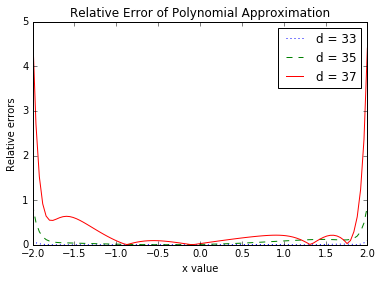

In [658]:
# Relative Error Plotting

step = 100 
uk = np.linspace(-2, 2, step)

k = 3
marks = [':','--','-']
for j in range(k):
    d = j*2 + 33
    xk = np.linspace(-2, 2, d)
    fk = [g(x) for x in xk]
    pk = pFit(xk, fk)[0]
    
    rel_error = [np.abs(pEval(x, pk) - g(x))/g(x) for x in uk]
    plt.plot(uk, rel_error, label="d = %d"%d, linestyle = marks[j%3])
plt.legend()
plt.title("Relative Error of Polynomial Approximation")
plt.xlabel("x value")
plt.ylabel("Relative errors")

### Comments:
1. For polynomial fitting, overfitting happens for $d\sim 35$. 

2. Errors increase significantly for $|x| \geq 1$.

3. Errors in $|x| \leq 1$ remains relatively small.



Note that we have
$$
s(x) = q_k(x) = a_k+b_k(x−x_k)+c_k(x−x_k)^2+d_k(x−x_k)^3,
$$
then the number of unknows is 
$$
d \cdot (\text{degree} + 1) = d (3+1) = 4d.
$$
The number of equations is
$$
\#(\text{points}) + \#(\text{points} - 1)\cdot \#(\text{continuity condition} - 1)
+ \#(\text{natural boundary conditions});
$$
that is,
$$
d+1 + (d-1)(4-1) + 2 = (d+1) + (3d-3) + 2 = 4d.
$$

Therefore, there are $4d$ equations and $4d$ unknowns. 

In particular:
$$
a_k =f_k 
$$ 
for $k = 0,1, ..., d-1$ i.e. $n$ equations;

$$
a_k + b_k \Delta x + c_k \Delta x^2 + d_k \Delta x^3 = f_{k+1}
$$ 
for $k = 0, ..., d-1$;

$$
b_k + 2c_k \Delta x + 3 d_k \Delta x^2 - b_{k+1} = 0
$$ 
for $k = 0, 1, ..., d-2$;

$$
2c_k + 6 d_k \Delta x -2 c_{k+1} = 0
$$ 
for $k = 0, 1, ..., d-2$;

$$
c_0 = 0;
$$

$$
2c_{d-1} + 6 d_{d-1} \Delta x = 0.
$$

Will have the vector:
$$
p = 
\begin{bmatrix}
a_0 & b_0 & c_0 & d_0 & \cdots & c_{d-1} & d_{d-1}
\end{bmatrix}^T
$$
and 
$$
V \cdot p = w =
\begin{bmatrix}
f_0 & f_1 & 0 & 0 & f_1 & f_2 & 0 & 0 & \cdots &
f_{d-1} & f_d & 0 & 0
\end{bmatrix}^T
$$
where the last two zeros come from natural boundary condition.

In [659]:
# sFit.py


# V * p = w

# get the V matrix
# input:
# (x0, xd): inverval, d: d+1 points
# dim V: 4d times 4d
def get_V(xk):
    b, a= xk[-1], xk[0]
    d = len(xk) - 1
    delta = (b-a)/d # delta_x
    V = np.array([4*d*[0] for i in range(4*d)])
    # s(x_k), s(x_k+1)
    for i in range(d):
        V[0+4*i][0+4*i] = 1
        V[1+4*i][0+4*i : 4+4*i] = [1, delta, pow(delta, 2), pow(delta,3)]
    # s', s''
    for i in range(d-1):
        V[2+4*i][0+4*i : 6+4*i] = [0,1, 2*delta, 3*pow(delta, 2),0, -1] #ak,..dk,a_k+1, b_k+1
        V[3+4*i][0+4*i : 7+4*i] = [0,0, 2, 6*delta, 0, 0, -2]
    # Natural boundary    
    V[-2][2] = 1
    V[-1][-2:] = [2, 6*delta]
    return V


# generate vector W, given fk
# len(W) = 4 * d
def get_w(fk):
    d = len(fk)-1 
    w = np.zeros(4*d)
    for i in range(d):
        w[0+4*i : 2+4*i] = [fk[0 + i], fk[1 + i]]
    return w


# sFit.py
# Given xk and fk, run the spline cubic fit

def sFit(xk, fk):
    x0, xd = xk[0], xk[-1]
    d = len(fk) - 1
    w = get_w(fk)
    V = get_V(xk)
    p = np.dot(LA.inv(V), w)
    return p


In [660]:
# sEval.py


# Evaluate cubic function a + bu + cu^2 + du^3, u = x - xj

def cubic(coeff, xj, x):
    a, b, c, d = coeff[0],coeff[1],coeff[2],coeff[3]
    delta = x- xj
    value = a + b*delta + c*pow(delta, 2) + d*pow(delta, 3)
    return value


# Given number r and  partition xk
# return index j, s.t xk[j+1] > r
def get_index(xk, r):
    for i in range(len(xk)):
        if xk[0] > r:
            print('Error: input value out of range.')
            return None
        elif xk[i]> r :
            break
    j = i-1
    return j

# Evaluate with spline method
# Input: 
# xk: d+1 points; fk: d+1 value; x: input value
def sEval(xk, fk, x):
    pk = sFit(xk, fk)
    j = get_index(xk, x)
    coeff = pk[0 + j*4 : 4 + j*4]
    value = cubic(coeff, xk[j], x)
    return value #, coeff, j, pk

In [661]:
# Ex.
# Test sFit
# Generate V p = w


b = 6
a = 3
d = 2
delta = (b-a)/d
xk = np.linspace(a, b, d+1)
fk = np.linspace(a, b, d+1)

V = get_V(xk)
w = get_w(fk)
p = sFit(xk, fk)

print("---- Generating V ----")
print(V)
print("---- Generating w ----")
print(w)
print("---- Generating p ----")
print(p)

print("---- V * w - p ----")
print(np.dot(V, w) - p)

---- Generating V ----
[[ 1  0  0  0  0  0  0  0]
 [ 1  1  2  3  0  0  0  0]
 [ 0  1  3  6  0 -1  0  0]
 [ 0  0  2  9  0  0 -2  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  0  0  1  1  2  3]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  9]]
---- Generating w ----
[ 3.   4.5  0.   0.   4.5  6.   0.   0. ]
---- Generating p ----
[  3.00000000e+00   1.50000000e+00   0.00000000e+00   5.55111512e-17
   4.50000000e+00   1.50000000e+00  -2.22044605e-16   0.00000000e+00]
---- V * w - p ----
[  0.00000000e+00   6.00000000e+00  -1.50000000e+00  -5.55111512e-17
   0.00000000e+00   9.00000000e+00   2.22044605e-16   0.00000000e+00]


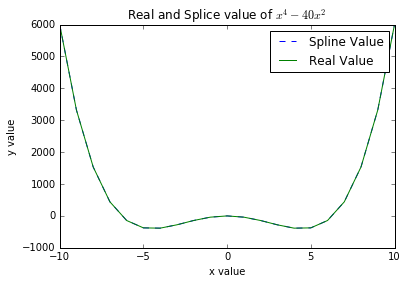

In [662]:
# Test both sEval and sFit
# Ex. p = x^4 - 40 x^2

d = 20
xk = np.linspace(-10, 10, d+1)
# Direct computation
fk = [pow(i,4)-40*pow(i,2) for i in xk]


s_value = [sEval(xk, fk, i) for i in xk]
plt.plot(xk, s_value, linestyle = '--', label = 'Spline Value')
plt.plot(xk, fk, linestyle = '-', label = 'Real Value')
plt.legend()
plt.title("Real and Splice value of $x^4 - 40 x^2$")
plt.xlabel("x value")
plt.ylabel("y value")




Note that:
\begin{align*}
q'_k(x) &= b_k + 2c_k (x-x_k) + 3d_k(x-x_k)^2 \\
q''_k(x) &= 2c_k  + 6d_k(x-x_k) \\
q'''_k(x) &= 6d_k
\end{align*}

In [ ]:
# sTest.py
# Ex. p = x^4 - 40 x^2

# Initial Data
b = 10
a = 0
d = 5
xk = np.linspace(a, b, d+1)
fk = [pow(i,3) for i in xk]


# Generate denser set
d_dense = 600
xk_dense = np.linspace(a, b, d_dense)
fk_dense = [pow(i,3)-pow(i,2) for i in xk_dense]



s_value = [sEval(xk, fk, i) for i in xk_dense]

# Continuity around xk
derivative = ()
for i in xk:
    index = get_index(xk_dense, i)
    diff_value = s_value[index+1] - s_value[index]
    diff_input = xk_dense[index] - xk_dense[index+1]
    derivative = np.append(derivative, np.abs(diff_value/diff_input))
    #derivative = np.append(derivative,diff_value/diff_input)
plt.plot(xk, derivative)


derivative2 = ()
l = len(derivative)
xk2 = xk[0:l]







In [ ]:
for i in xk[:-1]:
    index = get_index(xk_dense, i)
    diff_value = derivative[index+1] - derivative[index]
    diff_input = xk_dense[index] - xk_dense[index+1]
    derivative2 = np.append(derivative2, np.abs(diff_value/diff_input))
    #derivative = np.append(derivative,diff_value/diff_input)



### Comments:
1. s, s' and s'' are continuous

2. Natural boundary conditions are satisfied.


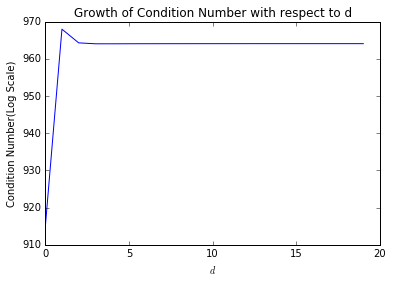

In [672]:
# plot the condition number with respect to d

# Module with condition number computation
def sFit2(xk, fk):
    x0, xd = xk[0], xk[-1]
    d = len(fk) - 1
    w = get_w(fk)
    V = get_V(xk)
    p = np.dot(LA.inv(V), w)
    cond = LA.cond(V)
    return p, cond, V

# Set maximal d
d_max = 20
cond_no = np.zeros(d_max)
#x = np.random.rand(d_max)
#f = np.random.rand(d_max)
x = np.linspace(-10, 100, d_max)
f = 100*x

# Take partial array for condition number computation
for j in range(d_max):
    i = j + 2
    cond_no[j] = sFit2(x[:i], f[:i])[1]
    
# Plotting 
plt.plot(cond_no)
#plt.yscale('log')
plt.ylabel("Condition Number(Log Scale)")
plt.xlabel("$d$")
plt.title("Growth of Condition Number with respect to d")




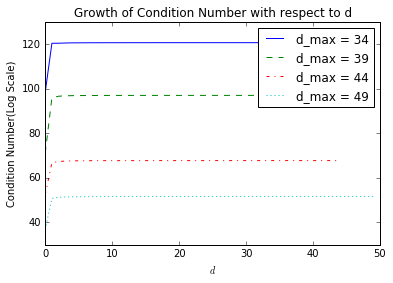

In [673]:
# plot the condition number with respect to d

# Module with condition number computation
def sFit2(xk, fk):
    x0, xd = xk[0], xk[-1]
    d = len(fk) - 1
    w = get_w(fk)
    V = get_V(xk)
    p = np.dot(LA.inv(V), w)
    cond = LA.cond(V)
    return p, cond, V



linestyles = ['-', '--', '-.', ':']
line_ind = 0
for k in np.arange(0,20,5):
    # Set maximal d
    d_max = int(k + 35)
    cond_no = np.zeros(d_max)
    x = np.linspace(-10, 100, d_max)
    f = 100*x
    # Take partial array for condition number computation
    for j in range(d_max):
        i = j + 2
        cond_no[j] = sFit2(x[:i], f[:i])[1]
    # Plotting 
    plt.plot(cond_no, label ="d_max = %d"%j, linestyle = linestyles[line_ind % 4] )
    line_ind +=  1
             


plt.ylabel("Condition Number(Log Scale)")
plt.xlabel("$d$")
plt.title("Growth of Condition Number with respect to d")
plt.legend()



### Comments:
The condition number no longer grows exponentially; insted it reaches the maximal value in the spline method.

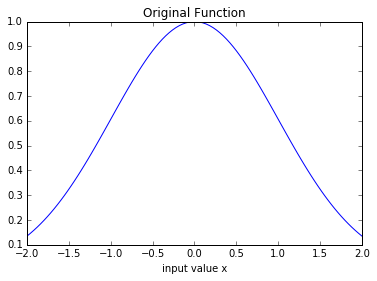

In [604]:
def g(x):
    return np.exp(-pow(x, 2)/2.)


# Evaluate for Polyn
step = 100 
uk = np.linspace(-2, 2, step)
fk = [g(x) for x in uk]
pk = sFit(uk, fk)[0]

#plt.plot(xk, fk)
plt.plot(uk, fk)
plt.title("Original Function")
plt.xlabel("input value x")




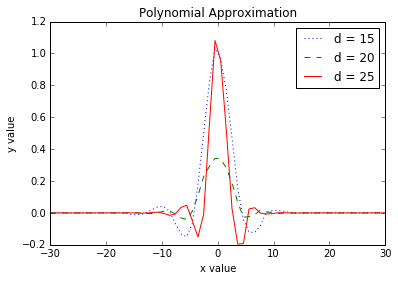

In [644]:
# xk: d+1 points; fk: d+1 value; x: input value
# def sEval(xk, fk, x):

# Evaluation for Polyn
a = -30
b = 30
step = 60
uk = np.linspace(a, b, step)
fk_plot = [g(x) for x in uk]

k = 3
marks = [':','--','-']
for j in range(k):
    d = j*5 + 15
    xk = np.linspace(a, b, d)
    fk = [g(x) for x in xk]
    pk = sFit2(xk, fk)[0]
    
    fk_eval = [sEval(xk, fk, x) for x in uk]
    plt.plot(uk, fk_eval, label="d = %d"%d, linestyle = marks[j%3])
plt.legend()
plt.title("Polynomial Approximation")
plt.xlabel("x value")
plt.ylabel("y value")

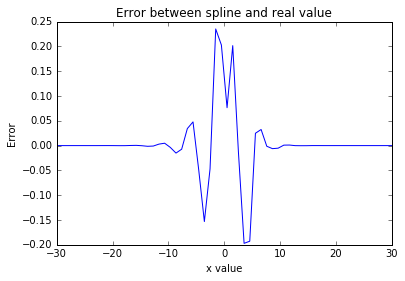

In [647]:
plt.plot(np.array(uk), np.array(fk_eval) - np.array(fk_plot))
plt.ylabel("Error")
plt.xlabel("x value")
plt.title("Error between spline and real value")